In [ ]:
#Nama : David
#NIM  : 41818010051

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv("testcpns.csv")
df.head()

,toefl,ipk,pengalaman_kerja,diterima
0,780,4.00,3,1
1,750,3.09,4,1
2,690,3.03,3,0
3,710,3.07,5,1
4,680,3.09,4,0


In [3]:
df.describe()

,toefl,ipk,pengalaman_kerja,diterima
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,2.694500,3.425000,0.475000
std,61.427464,0.653899,1.737778,0.505736
min,540.000000,1.070000,1.000000,0.000000
25%,607.500000,2.070000,2.000000,0.000000
50%,660.000000,3.030000,4.000000,0.000000
75%,690.000000,3.070000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


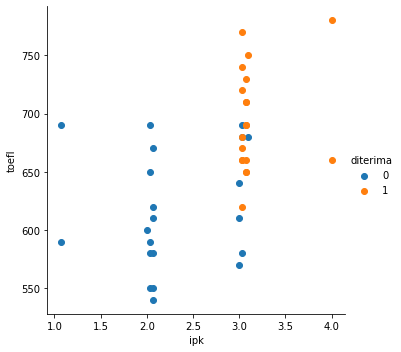

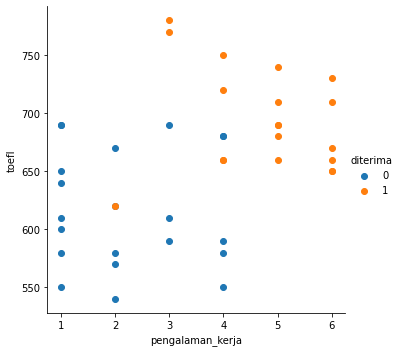

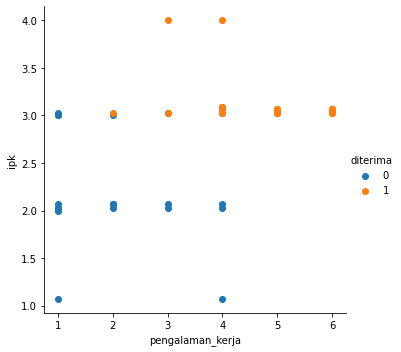

In [4]:
sns.FacetGrid(df,hue="diterima", height=5) \
.map(plt.scatter, "ipk", "toefl",) \
.add_legend()
sns.FacetGrid(df,hue="diterima", height=5) \
.map(plt.scatter, "pengalaman_kerja", "toefl",) \
.add_legend()
sns.FacetGrid(df,hue="diterima", height=5) \
.map(plt.scatter, "pengalaman_kerja", "ipk",) \
.add_legend()

C:\Users\David Syahputra\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


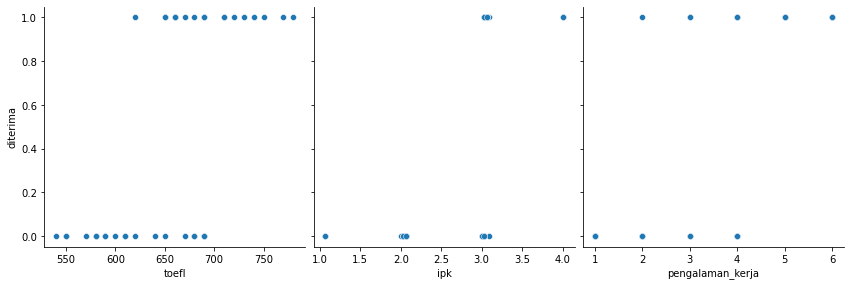

In [5]:
sns.pairplot(df, x_vars=['toefl', 'ipk', 'pengalaman_kerja'], y_vars='diterima', size=4, aspect=1, kind='scatter')
plt.show()

In [6]:
actual =[0,0,0,1,0,0,1,0,1,1,1,0]
predicted =[0,0,0,0,0,1,1,0,1,1,1,0]

In [7]:
matrix = confusion_matrix(actual,predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[6 1]
 [1 4]]


In [8]:
tp, fn, fp, tn = confusion_matrix(actual,predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 6 1 1 4


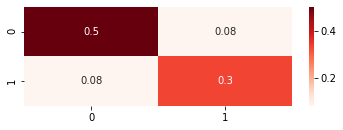

In [9]:
plt.subplot(2,1,2)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='0.1', cmap='Reds');

In [10]:
df1 = df[['toefl', 'ipk','pengalaman_kerja']]
df_split = df1.sample(frac=0.6,random_state=200)
df_split.reset_index()

,index,toefl,ipk,pengalaman_kerja
0,20,620,3.03,2
1,17,650,3.07,6
2,36,670,2.07,2
3,22,550,2.03,4
4,29,660,3.03,5
5,18,540,2.07,2
6,5,730,3.07,6
7,2,690,3.03,3
8,23,550,2.07,1
9,0,780,4.00,3


In [11]:
df2 = df[['diterima']]
df_split = df2.sample(frac=0.6,random_state=200)
df_split.reset_index()

,index,diterima
0,20,1
1,17,1
2,36,0
3,22,0
4,29,1
5,18,0
6,5,1
7,2,0
8,23,0
9,0,1
